## 파이썬 머신러닝
# 로지스틱 회귀 (Logistic Regression)

- 로지스틱 회귀는 이름과 다르게 **분류(Classification)** 알고리즘이다.
- 로지스틱 회귀는 각 클래스를 **직선** 또는 **평면** 으로 가른다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 샘플 만들기

In [35]:
from sklearn.datasets import make_blobs

X, y = make_blobs(400, 2, [[0,0],[5,5]], [2,3])

In [36]:
X.shape, y.shape

((400, 2), (400,))

In [37]:
X[:5]

array([[ 8.95335358,  4.01682163],
       [ 0.73768857,  1.76406282],
       [ 5.34081301,  0.6073248 ],
       [-2.97214197, -0.26846391],
       [ 1.11084573, -2.03341897]])

Text(0.5,1,'make_blobs() - 400 samples')

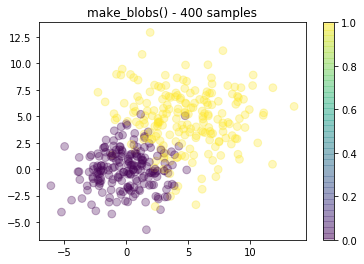

In [38]:
plt.scatter(X[:,0], X[:,1], c=y, s=60, alpha=0.3)
plt.colorbar()
plt.title('make_blobs() - 400 samples')

In [39]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets.samples_generator:

make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points equally divided among clusters.
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=3)
        The number of centers to generate, or the fixed center locations.
    
    cluster_std : float or sequence of floats, optional (default=1.0)
        The standard deviation of the clusters.
    
    center_box : pair of floats (min, max), optional (default=(-10.0, 10.0))
        The bounding box for each cluster center when centers a

In [40]:
np.bincount(y)

array([200, 200], dtype=int64)

In [41]:
X[y==1].mean(axis=0)

array([4.79919736, 4.64705034])

### 로지스틱 회귀 적용해 보기

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)
score = model.score(X, y)
print(score)

0.9225


In [43]:
display(model.coef_, model.intercept_)

array([[0.85580393, 0.75799646]])

array([-3.2013866])

In [45]:
w1 = model.coef_[0,0]
w2 = model.coef_[0,1]
b = model.intercept_[0]

w1, w2, b

(0.8558039345842997, 0.7579964563710291, -3.201386604140747)

In [46]:
pred_y_plain = w1*X[:,0] + w2*X[:,1] + b = 0
pred_y_plain

array([ 7.50566518e+00, -1.23291646e+00,  1.82965223e+00, -5.94845209e+00,
       -3.79204483e+00, -2.45522418e+00,  4.76008988e+00,  6.56507652e+00,
        5.03558170e+00,  5.44682579e-01, -3.11328071e+00,  1.01785049e+01,
        5.82577977e+00,  3.12705238e+00,  7.18697750e+00, -2.02838172e+00,
        3.17586747e-01,  7.91843241e+00, -5.75327438e+00,  2.20679300e+00,
        9.69603139e+00,  5.68908638e+00,  2.47516576e-01,  4.70725039e+00,
        5.68674869e+00, -7.04024266e-01, -6.06486012e+00,  8.23014891e+00,
        4.21599844e-01, -5.88316944e-01, -3.27641546e+00, -3.72490893e+00,
       -3.56430085e+00, -9.56201020e+00,  7.36831293e-01, -6.81281670e-01,
        5.47522177e+00,  1.72318025e-01,  6.85282006e+00, -3.03395296e+00,
       -1.88152392e+00,  1.22962441e+01, -9.25832418e-01,  9.92138296e-01,
       -9.17420904e+00, -3.16168325e+00,  2.44532498e+00, -8.49405072e-01,
        2.94613843e-01,  8.80523288e-01, -4.92791266e+00, -5.53529476e-01,
        1.09552281e+00, -

In [ ]:
w1*x1 + w2*x2 + b = 0
x2 = -w1/w2 * x1 - b/w2

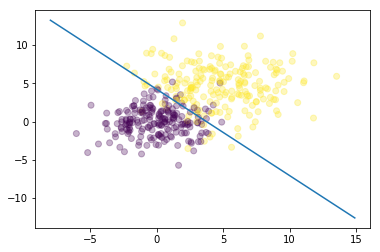

In [49]:
rng = np.arange(-8,15,0.1)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3)
plt.plot(rng, -w1/w2*rng - b/w2)

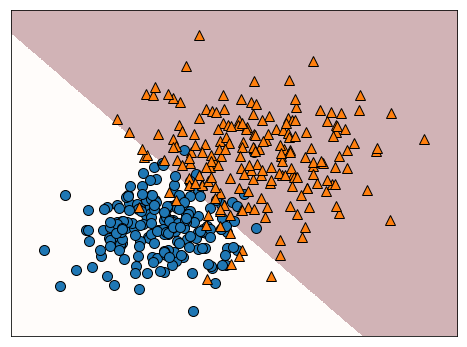

In [44]:
import mglearn

plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [15]:
pred_y = model.predict(X)
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [17]:
y[pred_y != y]

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0])

In [18]:
np.bincount(y[pred_y != y])

array([12, 19], dtype=int64)

### 시그모이드 함수

- 로지스틱회귀는 아래와 같은 시그모이드 함수를 적용하는 알고리즘이다.
- 시그모이드 함수는 다른 이름으로 로지스틱 함수라고도 불린다.
> $$ sigmoid(x) = \frac{1}{1+e^{-x}} $$

In [19]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

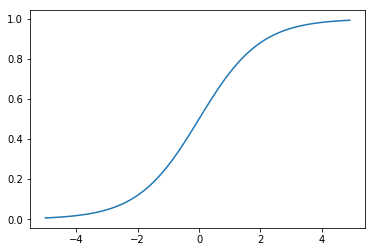

In [20]:
rng = np.arange(-5, 5, 0.1)
plt.plot(rng, sigmoid(rng))

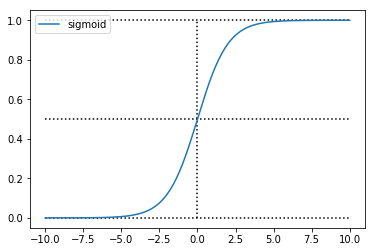

In [21]:
rng = np.arange(-10, 10.01, 0.1)
plt.hlines([0, 0.5, 1], -10, 10, linestyles=':')
plt.vlines([0], 0, 1, linestyles=':')
plt.plot(rng, sigmoid(rng), label='sigmoid')
plt.legend()

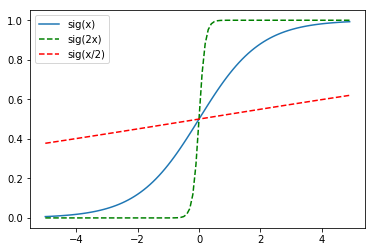

In [22]:
rng = np.arange(-5, 5, 0.1)
plt.plot(rng, sigmoid(rng))
plt.plot(rng, sigmoid(10*rng), 'g--')
plt.plot(rng, sigmoid(0.1*rng), 'r--')
plt.legend(['sig(x)', 'sig(2x)', 'sig(x/2)'])

Text(0.5,0,'target')

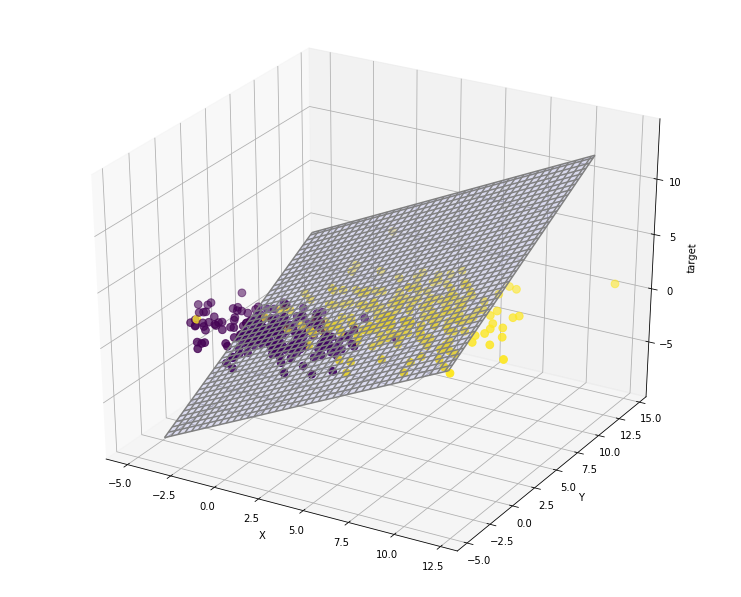

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[10,8])
ax = Axes3D(fig)

a = np.arange(-4,12,0.2)
b = np.arange(-4,12,0.2)
xx, yy = np.meshgrid(a,b)
ax.plot_surface(xx, yy, model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0],
                shade=True, alpha=0.1, color='b')
ax.plot_wireframe(xx, yy, model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0],
                  rstride=2, cstride=2, color='0.5')

ax.scatter(X[:,0], X[:,1], y, c=y, s=60)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('target')

#ax.view_init(60, 70)

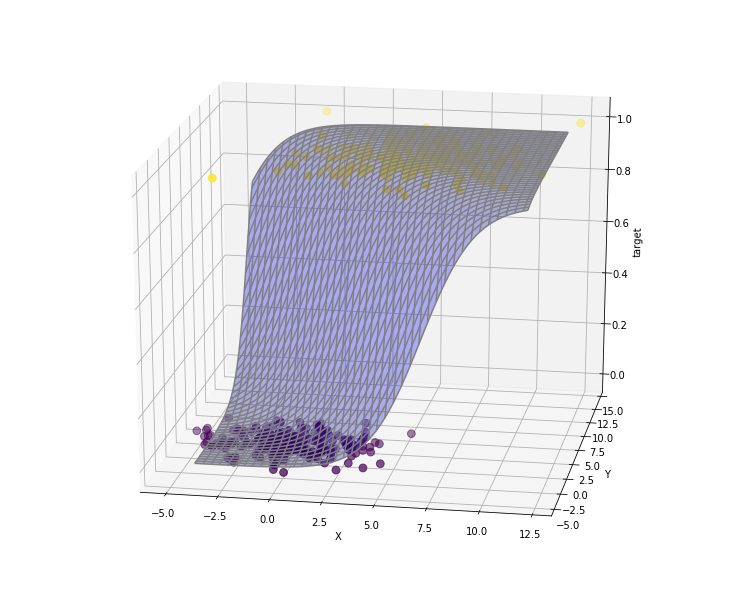

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[10,8])
ax = Axes3D(fig)

a = np.arange(-4,12,0.2)
b = np.arange(-4,12,0.2)
xx, yy = np.meshgrid(a,b)
ax.plot_surface(xx, yy, sigmoid(model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0]),
                shade=True, alpha=0.3, color='b')
ax.plot_wireframe(xx, yy, sigmoid(model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0]),
                  rstride=2, cstride=2, color='0.5')

ax.scatter(X[:,0], X[:,1], y, c=y, s=60)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('target')

ax.view_init(20, -80)

### predict_proba() 함수
- 각 클래스에 속할 확률은 model.predict_proba() 함수로 알 수 있다.
- 각 행의 합은 1(100%)가 된다.

In [23]:
pred_y = model.predict(X)

In [24]:
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [26]:
display(model.predict_proba(X)[:10],2, pred_y[:10], y[:10])

array([[0.0328668 , 0.9671332 ],
       [0.01678101, 0.98321899],
       [0.00524968, 0.99475032],
       [0.0126349 , 0.9873651 ],
       [0.00249467, 0.99750533],
       [0.04467764, 0.95532236],
       [0.34329515, 0.65670485],
       [0.10247881, 0.89752119],
       [0.01254902, 0.98745098],
       [0.74789983, 0.25210017]])

2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

- 각 샘플의 확률(sigmoid 적용값) 계산
> $$ 평면높이 = w_1 x_1 + w_2 x_2 + b $$
> $$ 시그모이드평면높이 = \frac {1} {1 + e^{-(w_1 x_1 + w_2 x_2 + b)}} $$

In [29]:
n = 1
p1 = sigmoid(model.coef_[0,0]*X[n,0] + model.coef_[0,1]*X[n,1] + model.intercept_[0])
p0 = 1-p1
p0, p1

(0.016781009007563852, 0.9832189909924361)

- decision_function() : 각 샘플의 평면까지의 거리

In [30]:
model.decision_function(X)[:10]

array([ 3.38187314,  4.07058404,  5.24432492,  4.35857729,  5.99109953,
        3.06257578,  0.64864409,  2.16998071,  4.36548409, -1.08744254])

In [31]:
n=0
model.coef_[0,0]*X[n,0] + model.coef_[0,1]*X[n,1] + model.intercept_[0]

3.3818731353358804

### 클래스가 3개인 경우

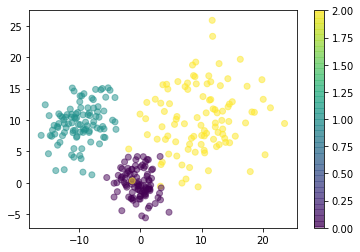

In [54]:
from sklearn.datasets import make_blobs

X, y = make_blobs(300, 2, [[0,0],[-10,10],[10,10]], [2,3,5])

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5)
plt.colorbar()

In [55]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)
score = model.score(X, y)
score

0.9866666666666667

In [56]:
display(model.coef_, model.intercept_)

array([[-0.03988828, -0.79846695],
       [-0.73144886,  0.26505501],
       [ 0.80575883,  0.36808634]])

array([ 2.24111412, -4.1692774 , -3.16249007])

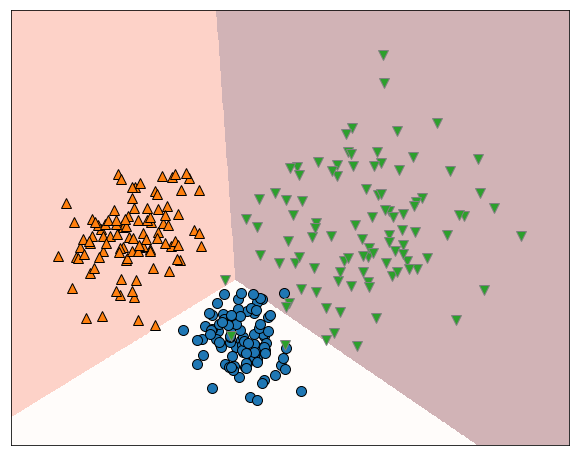

In [57]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

### 일대다 분류
- 한 클래스와 나머지 클래스 간의 경계선을 그린다
- 이렇게 나온 경계선들을 통합하여 판정을 내린다

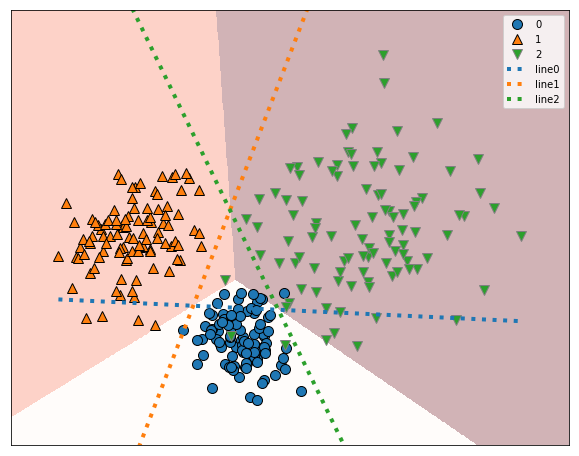

In [58]:
plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

w = model.coef_
b = model.intercept_

rng = np.array([X[:,0].min(), X[:,0].max()])
for i in range(3):
    plt.plot(rng, -(w[i,0]*rng + b[i])/w[i,1], ':', lw=4, label='line'+str(i))
plt.legend()

In [59]:
pred_y = model.predict(X)
display(np.round(model.predict_proba(X)[:10],2), pred_y[:10], y[:10])

array([[0.11, 0.89, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.08, 0.92, 0.  ],
       [0.  , 0.02, 0.98],
       [0.01, 0.99, 0.  ],
       [0.68, 0.01, 0.31],
       [0.02, 0.98, 0.  ],
       [0.36, 0.  , 0.64],
       [0.  , 0.04, 0.96],
       [0.23, 0.77, 0.  ]])

array([1, 2, 1, 2, 1, 0, 1, 2, 2, 1])

array([1, 2, 1, 2, 1, 0, 1, 2, 2, 1])

In [60]:
model.decision_function(X)[:10]

array([[ -1.99630452,   7.2869264 , -11.83462373],
       [-11.05216416,  -8.32114801,  12.0211037 ],
       [ -2.37244787,   7.12867804, -11.36188788],
       [ -6.9756974 ,  -4.03573926,   4.18010814],
       [ -4.77603225,   5.69344815,  -7.89275768],
       [  0.52906253,  -4.96885833,  -0.92694506],
       [ -4.00303834,   4.10023632,  -6.83588265],
       [  0.2683568 , -11.79294008,   6.49993355],
       [-10.44248961,  -3.15654475,   6.06546111],
       [ -0.85057506,   8.02303676, -13.54322293]])

### 확률 계산

In [51]:
help(model.predict_proba)

Help on method predict_proba in module sklearn.linear_model.logistic:

predict_proba(X) method of sklearn.linear_model.logistic.LogisticRegression instance
    Probability estimates.
    
    The returned estimates for all classes are ordered by the
    label of classes.
    
    For a multi_class problem, if multi_class is set to be "multinomial"
    the softmax function is used to find the predicted probability of
    each class.
    Else use a one-vs-rest approach, i.e calculate the probability
    of each class assuming it to be positive using the logistic function.
    and normalize these values across all the classes.
    
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
    
    Returns
    -------
    T : array-like, shape = [n_samples, n_classes]
        Returns the probability of the sample for each class in the model,
        where classes are ordered as they are in ``self.classes_``.



In [61]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
 |  both dense and sparse input. Use C-ordered arrays or CSR matrices
 |  containing 64-bit floats for optimal performance; any other input format
 |  will be converted (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solve

In [62]:
result = sigmoid(X@(w.T)+b)
result.shape

(300, 3)

In [63]:
result[:10]

array([[1.19591470e-01, 9.99316040e-01, 7.24911634e-06],
       [1.58525528e-05, 2.43257186e-04, 9.99993984e-01],
       [8.52979570e-02, 9.99198864e-01, 1.16302684e-05],
       [9.33442422e-04, 1.73657132e-02, 9.84933615e-01],
       [8.35891793e-03, 9.96643345e-01, 3.73298926e-04],
       [6.29264436e-01, 6.90309537e-03, 2.83544906e-01],
       [1.79326232e-02, 9.83701290e-01, 1.07336513e-03],
       [5.66689456e-01, 7.55766983e-06, 9.98498718e-01],
       [2.91656539e-05, 4.08341699e-02, 9.97683691e-01],
       [2.99312238e-01, 9.99672284e-01, 1.31296287e-06]])

In [64]:
prob = result/((result.sum(axis=1)).reshape(-1,1))
prob

array([[1.06881663e-01, 8.93111858e-01, 6.47870294e-06],
       [1.58485416e-05, 2.43195634e-04, 9.99740956e-01],
       [7.86512608e-02, 9.21338015e-01, 1.07239998e-05],
       [9.30434541e-04, 1.73097547e-02, 9.81759811e-01],
       [8.31422430e-03, 9.91314473e-01, 3.71302964e-04],
       [6.84196941e-01, 7.50571058e-03, 3.08297348e-01],
       [1.78842057e-02, 9.81045327e-01, 1.07046707e-03],
       [3.62056607e-01, 4.82857810e-06, 6.37938564e-01],
       [2.80831327e-05, 3.93185564e-02, 9.60653360e-01],
       [2.30419940e-01, 7.69579049e-01, 1.01075996e-06],
       [4.28035848e-01, 5.71961788e-01, 2.36423376e-06],
       [9.75066740e-01, 1.80937882e-02, 6.83947200e-03],
       [3.98867081e-02, 9.60111866e-01, 1.42604205e-06],
       [9.59440949e-01, 8.13961795e-03, 3.24194333e-02],
       [3.26286420e-04, 3.63090442e-02, 9.63364669e-01],
       [1.98640034e-04, 8.33907881e-01, 1.65893479e-01],
       [1.27628390e-03, 9.98406754e-01, 3.16962401e-04],
       [1.43101486e-06, 3.32073

### 소프트맥스 함수 적용
- multi_class : str, {'ovr', 'multinomial'}, default: 'ovr'
- multi_class 옵션이 'ovr' 이면 일대다(one-vs.-rest) 이고, 'multinomial' 이면 소프트맥스 함수를 적용한다
> $ softmax(n) = exp(p_n) / \sum_i exp(p_i) $ <br>
> $ p_i = \sum_j (w_j*x_j) + b $

In [53]:
result = X@(w.T)+b
result.shape

(300, 3)

In [56]:
prob = np.exp(result)/((np.exp(result).sum(axis=1)).reshape(-1,1))
np.round(prob[:10], 2)

array([[0.08, 0.  , 0.92],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ]])

### 중요옵션 C!

- 로지스틱회귀의 중요 옵션은 C 이다.
- C 값이 커질수록 학습데이터에 최대한 맞추려고 한다. 즉 과대적합된다.

0.9866666666666667


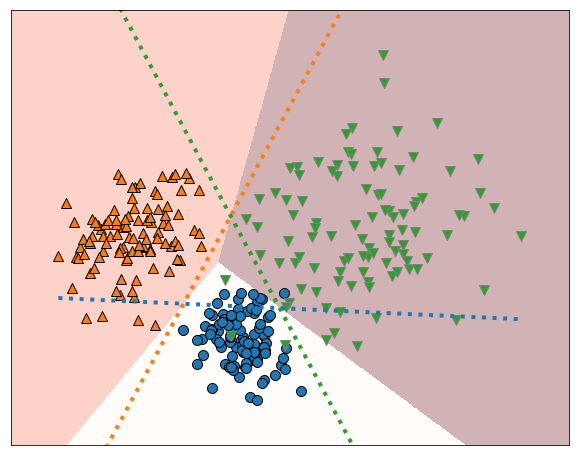

In [74]:
model = LogisticRegression(C=10000)
model.fit(X, y)
score = model.score(X, y)
print(score)

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

w = model.coef_
b = model.intercept_

rng = np.array([X[:,0].min(), X[:,0].max()])
for i in range(3):
    plt.plot(rng, -(w[i,0]*rng + b[i])/w[i,1], ':', lw=4)

- 비용함수에 $ \frac{1}{C} \cdot \sum_i w_i^2 $ 항을 추가함
> C 의 역수는 $ \alpha $ 임 ($ \alpha \cdot \sum_i w_i^2 $)<br>
> penalty='l1' 인 경우 $ \frac{1}{C} \cdot \sum_i |w_i| $ 항이 추가됨

In [58]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It 

### Iris 데이터 - 속성 2개로 제한

In [78]:
from sklearn.datasets import load_iris

iris = load_iris()

col1 = 1
col2 = 3

X = iris.data[:, [col1,col2]]
y = iris.target

X.shape, y.shape

((150, 2), (150,))

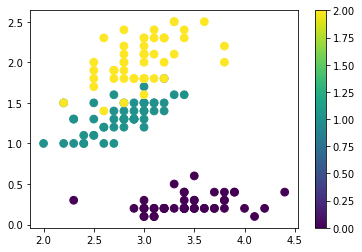

In [79]:
plt.scatter(X[:,0], X[:,1], c=y, s=60)
plt.colorbar()

In [92]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1)
model.fit(X, y)
score = model.score(X, y)
score

0.9466666666666667

In [93]:
display(model.coef_, model.intercept_)

array([[ 1.17857118, -4.20397905],
       [-1.06767017,  0.30439343],
       [-1.72595521,  3.95376877]])

array([-0.36473596,  2.07538234, -1.53014082])

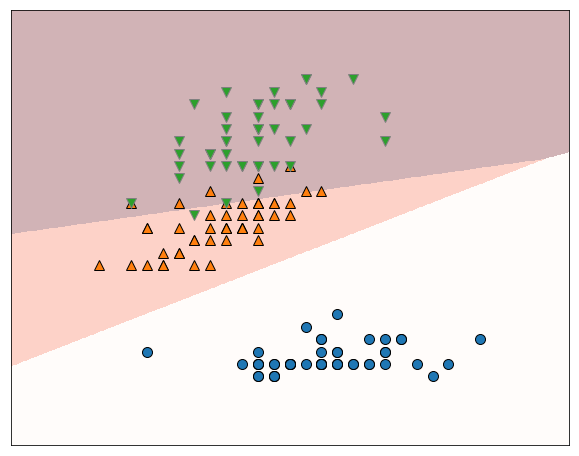

In [94]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

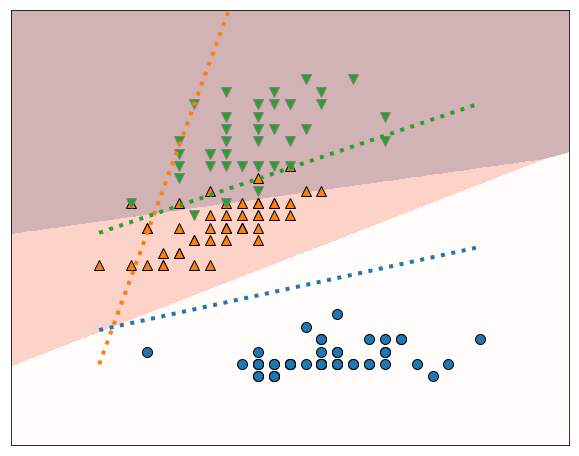

In [95]:
plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

rng = np.array([X[:,0].min(), X[:,0].max()])
for i in range(3):
    plt.plot(rng, -(model.coef_[i,0]*rng + model.intercept_[i])/model.coef_[i,1], ':', lw=4)

### Iris 데이터 - 모든 속성 사용

In [104]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

X_train.shape, X_test.shape

((112, 4), (38, 4))

In [105]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print(score_train, score_test)

0.9642857142857143 0.9210526315789473


In [106]:
display(model.coef_, model.intercept_)

array([[ 0.40661085,  1.37482745, -2.15189447, -0.9622436 ],
       [ 0.4401305 , -1.62491811,  0.56440298, -1.20934393],
       [-1.57815035, -1.31269996,  2.23922937,  2.23138205]])

array([ 0.2498939 ,  0.89584084, -1.04718742])

In [110]:
np.round(model.predict_proba(X_test), 3)[:5], y_test[:5]

(array([[0.001, 0.336, 0.663],
        [0.043, 0.782, 0.175],
        [0.968, 0.032, 0.   ],
        [0.001, 0.426, 0.574],
        [0.18 , 0.678, 0.143]]), array([2, 1, 0, 2, 1]))

In [111]:
pred_y = model.predict(X_test)

In [112]:
y_test[y_test!=pred_y]

array([1, 2, 1])

In [116]:
np.round(model.predict_proba(X_test)[y_test==2], 3)

array([[0.001, 0.336, 0.663],
       [0.001, 0.426, 0.574],
       [0.003, 0.301, 0.696],
       [0.   , 0.309, 0.691],
       [0.002, 0.257, 0.741],
       [0.001, 0.238, 0.761],
       [0.003, 0.508, 0.489],
       [0.001, 0.186, 0.814],
       [0.001, 0.269, 0.73 ],
       [0.001, 0.324, 0.675],
       [0.003, 0.432, 0.565],
       [0.   , 0.442, 0.558],
       [0.   , 0.438, 0.562],
       [0.006, 0.347, 0.648],
       [0.   , 0.454, 0.546],
       [0.002, 0.341, 0.657]])

### 옵션(C) 변경 및 과적합 판단

Text(0,0.5,'score')

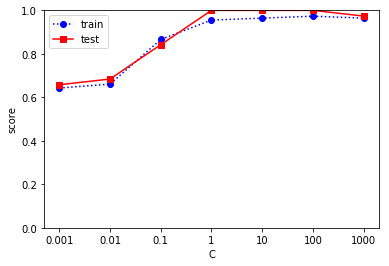

In [146]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

s1 = []
s2 = []
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

for c in Cs:
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)

    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)

    s1.append(score_train)
    s2.append(score_test)
    
plt.plot(s1,'bo:')
plt.plot(s2,'rs-')
plt.legend(['train','test'])
plt.xticks(range(len(Cs)),Cs)
plt.ylim(0,1)
plt.xlabel('C')
plt.ylabel('score')

### 시그모이드(sigmoid) 함수 적용

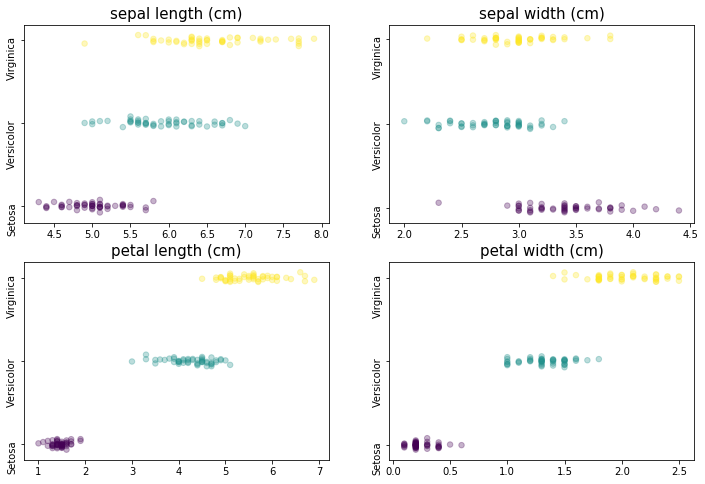

In [39]:
plt.figure(figsize=[12,8])

for col in range(4):
    plt.subplot(2,2,col+1)
    plt.scatter(iris.data[:,col], iris.target + np.random.normal(0,0.03,size=len(y)), c=iris.target, s=30, alpha=0.3)
    plt.yticks([0,1,2], ['Setosa', 'Versicolor', 'Virginica'], rotation=90)
    plt.title(iris.feature_names[col], fontsize=15)

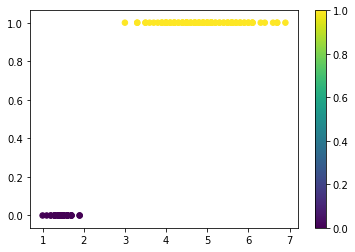

In [147]:
X = iris.data[:,[2]]
y = iris.target.copy()
y[y==2] = 1

plt.scatter(X[:,0], y, c=y, s=30)
plt.colorbar()

In [148]:
def sigmoid(t):
    return 1/(1+np.exp(-t))

Text(0.5,1,'Sigmoid')

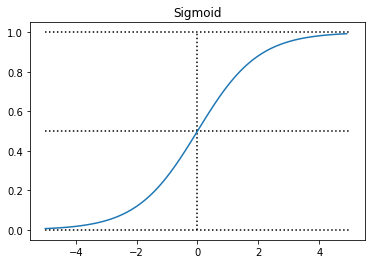

In [149]:
rng = np.arange(-5,5,0.1)
plt.plot(rng, sigmoid(rng))

plt.hlines([0,0.5,1],-5,5,linestyles='dotted')
plt.vlines([0],0,1,linestyles='dotted')
plt.title('Sigmoid')

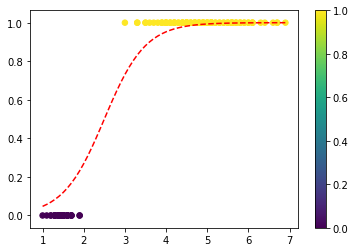

In [150]:
plt.scatter(X[:,0], y, c=y, s=30)
plt.colorbar()

rng = np.arange(1,7,0.1)
plt.plot(rng, sigmoid(2*(rng-2.5)), 'r--')

In [157]:
from sklearn.linear_model import LogisticRegression

C = 1
model = LogisticRegression(C=C)
model.fit(X, y)

display(model.score(X, y), model.coef_, model.intercept_)

1.0

array([[1.72960591]])

array([-4.28674842])

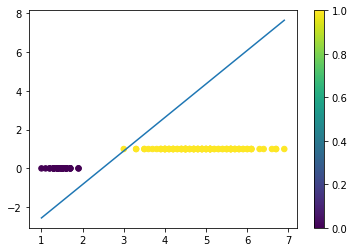

In [158]:
plt.scatter(X[:,0], y, c=y, s=30)
plt.colorbar()

rng = np.arange(1,7,0.1)
plt.plot(rng, model.coef_[0]*rng + model.intercept_)

In [159]:
경계값 = -model.intercept_/model.coef_
경계값

array([[2.47845384]])

(-0.5, 1.5)

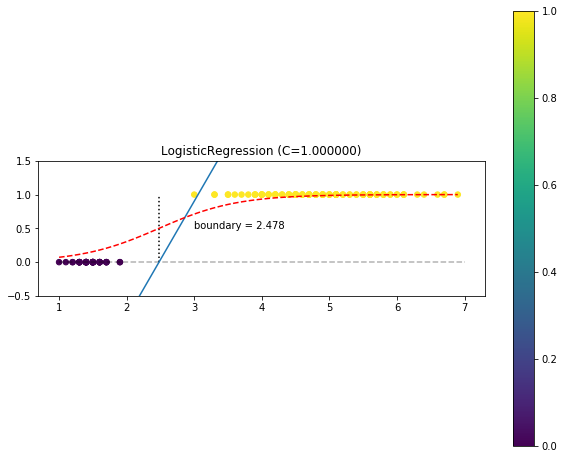

In [160]:
plt.figure(figsize=[10,8])

plt.scatter(X[:,0], y, c=y, s=30)
plt.colorbar()

rng = np.arange(1,7,0.1)
plt.plot(rng, model.coef_[0]*rng + model.intercept_)
plt.plot(rng, sigmoid(model.coef_[0,0]*rng+model.intercept_[0]), 'r--')
plt.vlines([-model.intercept_[0]/model.coef_[0,0]],0,1,linestyles='dotted')
plt.hlines([0],1,7,linestyles='dashed', alpha=0.3)
plt.text(3, 0.5, 'boundary = %.3f' % (-model.intercept_[0]/model.coef_[0,0]))
plt.title('LogisticRegression (C=%f)' % C)
plt.axis('scaled')
plt.ylim(-0.5, 1.5)

### 관련 기술
- 공식
$$ sigmoid(t) = \frac{1}{1 + e^{-t}} $$
<br>
$$ t = w \cdot x + b $$
<br>
$$ sigmoid(t) = \frac{1}{1 + e^{-(w \cdot x + b)}} $$
<br>
$$ t = w_1 \cdot x_1 + w_2 \cdot x_2 + ... + b $$
$$ t = w_0 \cdot x_0 + w_1 \cdot x_1 + w_2 \cdot x_2 + ... , (x_0=1)$$

- 소프트맥스(softmax) 함수
- 크로스 엔트로피 (cross entropy)

### 크로스 엔트로피
- 로지스틱 회귀의 비용함수로 사용함

#### 클래스가 2개인 경우
- cross_entropy = (-y * np.log(pred_y) - (1-y) * np.log(1-pred_y)).sum()

#### 클래스가 3개 이상인 경우
- cross_entropy = (-y * np.log(pred_y)).sum()
- 여기서 pred_y  는 소프트맥스 함수를 적용한 결과임
- 그리고, y 는 [1,0,0], [0,1,0], [0,0,1] 과 같이 원핫인코딩이어야 함